# International football results from 1872 to 2019

## Context

Well, what happened was that I was looking for a semi-definite easy-to-read list of international football matches and couldn't find anything decent. So I took it upon myself to collect it for my own use. I might as well share it.

## Content

This dataset includes 40,838 results of international football matches starting from the very first official match in 1972 up to 2019. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

'results.csv' includes the following columns:

1. date - date of the match
2. home_team - the name of the home team
3. away_team - the name of the away team
4. home_score - full-time home team score including extra time, not including penalty-shootouts
5. away_score - full-time away team score including extra time, not including penalty-shootouts
6. tournament - the name of the tournament
7. city - the name of the city/town/administrative unit where the match was played
8. country - the name of the country where the match was played
9. neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


Note on team and country names: For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

## Acknowledgements

The data is gathered from several sources including but not limited to Wikipedia, fifa.com, rsssf.com and individual football associations' websites.

## Inspiration

Some directions to take when exploring the data:

1. Who is the best team of all time
2. Which teams dominated different eras of football
3. What trends have there been in international football throughout the ages - home advantage, total goals scored, distribution of teams' strength etc
4. Can we say anything about geopolitics from football fixtures - how has the number of countries changed, which teams like to play each other
5. Which countries host the most matches where they themselves are not participating in
6. How much, if at all, does hosting a major tournament help a country's chances in the tournament
7. Which teams are the most active in playing friendlies and friendly tournaments - does it help or hurt them

The world's your oyster, my friend.

# Stage 1 - Import the Dataset and Libraries:

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Code for Parallelising this workflow:

In [2]:
from multiprocessing import  Pool

def parallelize_dataframe(df, func, n_cores=5):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
#     df = pd.concat(pool.map(func, df_split))
    dictionary = (pool.map(func, df_split))
    pool.close()
    pool.join()
#     return df
    return dictionary

## Import Dataset:

In [3]:
path_directory = '/Users/y.s.lee/OneDrive/MSc Data Science/Semester 3/Data VIsualisation NEW (COMP5048)/Assignments/Assignment 2/Data/'

data_football_original = pd.read_csv(path_directory + 'results.csv')

# Stage 2 - Review the Dataset:

In [4]:
data_football = data_football_original.copy()
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
data_football.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [6]:
data_football.shape

(40839, 9)

In [7]:
data_football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


# Stage 3 - Clean the Dataset:

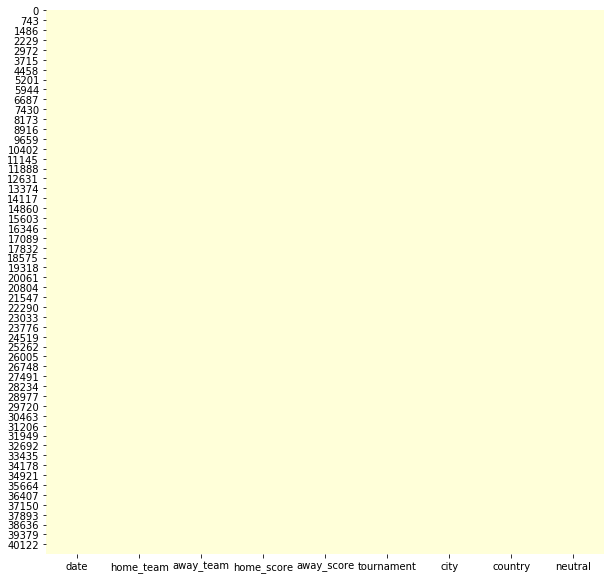

In [8]:
# Visualise it:

plt.figure(figsize=(10,10))
sns.heatmap(data_football.isnull(), cbar = False, cmap = "YlGnBu")

From the figure above, it seems like the dataset is complete and does not have missing data.

# Stage 4 - Exploratory Data Analysis:

### List the unique types of tournament:

In [9]:
data_football.tournament.unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

### Determine how many matches in each tournament:

In [10]:
data_football.tournament.value_counts()

Friendly                                16911
FIFA World Cup qualification             7100
UEFA Euro qualification                  2432
African Cup of Nations qualification     1616
FIFA World Cup                            900
Copa América                              813
AFC Asian Cup qualification               724
African Cup of Nations                    690
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Merdeka Tournament                        503
British Championship                      501
AFC Asian Cup                             370
Island Games                              350
Gulf Cup                                  333
Gold Cup                                  327
AFF Championship                          293
COSAFA Cup                                292
UEFA Euro                                 286
Nordic Championship                       283
African Nations Championship              268
CFU Caribbean Cup                 

### Visualise the popularity of the tournaments:

In [11]:
data_football_tournamentCount = data_football.tournament.value_counts().to_frame().reset_index().rename(columns={'tournament': 'count', 'index': 'tournament'})
data_football_tournamentCount

,tournament,count
0,Friendly,16911
1,FIFA World Cup qualification,7100
2,UEFA Euro qualification,2432
3,African Cup of Nations qualification,1616
4,FIFA World Cup,900
5,Copa América,813
6,AFC Asian Cup qualification,724
7,African Cup of Nations,690
8,CECAFA Cup,620
9,CFU Caribbean Cup qualification,606


In [12]:
print('The number of Tournaments are =', (len(data_football_tournamentCount)-1))

The number of Tournaments are = 108


[Text(0, 0, 'Friendly'),
 Text(0, 0, 'FIFA World Cup qualification'),
 Text(0, 0, 'UEFA Euro qualification'),
 Text(0, 0, 'African Cup of Nations qualification'),
 Text(0, 0, 'FIFA World Cup'),
 Text(0, 0, 'Copa América'),
 Text(0, 0, 'AFC Asian Cup qualification'),
 Text(0, 0, 'African Cup of Nations'),
 Text(0, 0, 'CECAFA Cup'),
 Text(0, 0, 'CFU Caribbean Cup qualification'),
 Text(0, 0, 'Merdeka Tournament'),
 Text(0, 0, 'British Championship'),
 Text(0, 0, 'AFC Asian Cup'),
 Text(0, 0, 'Island Games'),
 Text(0, 0, 'Gulf Cup'),
 Text(0, 0, 'Gold Cup'),
 Text(0, 0, 'AFF Championship'),
 Text(0, 0, 'COSAFA Cup'),
 Text(0, 0, 'UEFA Euro'),
 Text(0, 0, 'Nordic Championship'),
 Text(0, 0, 'African Nations Championship'),
 Text(0, 0, 'CFU Caribbean Cup'),
 Text(0, 0, 'Amílcar Cabral Cup'),
 Text(0, 0, "King's Cup"),
 Text(0, 0, 'South Pacific Games'),
 Text(0, 0, 'UNCAF Cup'),
 Text(0, 0, 'Korea Cup'),
 Text(0, 0, 'UEFA Nations League'),
 Text(0, 0, 'Confederations Cup'),
 Text(0, 0, 'SAF

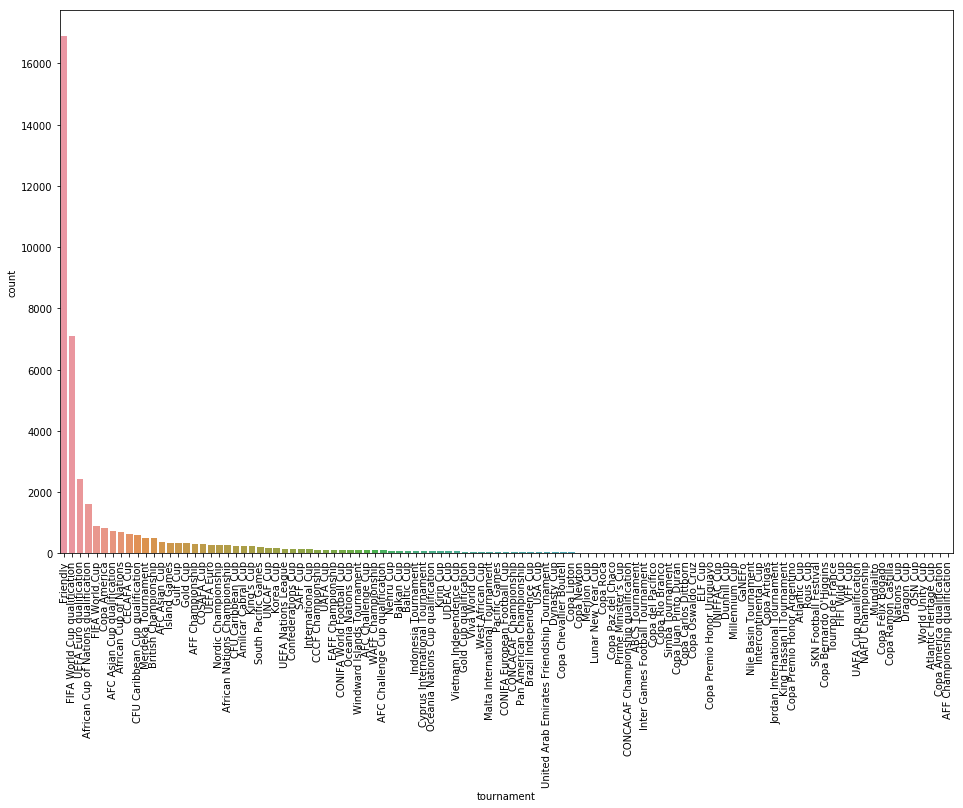

In [13]:
plt.figure(figsize=(16,10))

g = sns.barplot(x='tournament',
            y='count',
            hue=None,
            data=data_football_tournamentCount,
            hue_order=None)

loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)

### Split the above visualisation into smaller parts:

[Text(0, 0, 'Friendly'),
 Text(0, 0, 'FIFA World Cup qualification'),
 Text(0, 0, 'UEFA Euro qualification'),
 Text(0, 0, 'African Cup of Nations qualification'),
 Text(0, 0, 'FIFA World Cup'),
 Text(0, 0, 'Copa América'),
 Text(0, 0, 'AFC Asian Cup qualification'),
 Text(0, 0, 'African Cup of Nations'),
 Text(0, 0, 'CECAFA Cup'),
 Text(0, 0, 'CFU Caribbean Cup qualification'),
 Text(0, 0, 'Merdeka Tournament'),
 Text(0, 0, 'British Championship'),
 Text(0, 0, 'AFC Asian Cup'),
 Text(0, 0, 'Island Games'),
 Text(0, 0, 'Gulf Cup'),
 Text(0, 0, 'Gold Cup'),
 Text(0, 0, 'AFF Championship'),
 Text(0, 0, 'COSAFA Cup'),
 Text(0, 0, 'UEFA Euro'),
 Text(0, 0, 'Nordic Championship')]

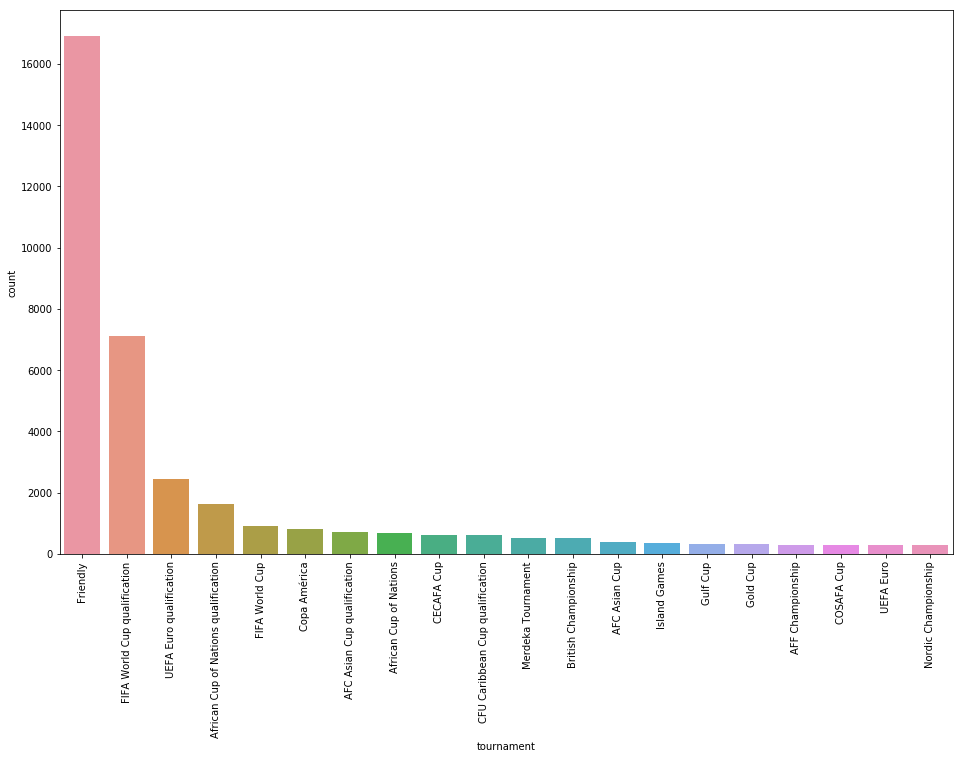

In [14]:
plt.figure(figsize=(16,10))

g = sns.barplot(x='tournament',
            y='count',
            hue=None,
            data=data_football_tournamentCount.head(20),
            hue_order=None)

loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)

[Text(0, 0, 'CFU Caribbean Cup'),
 Text(0, 0, 'Amílcar Cabral Cup'),
 Text(0, 0, "King's Cup"),
 Text(0, 0, 'South Pacific Games'),
 Text(0, 0, 'UNCAF Cup'),
 Text(0, 0, 'Korea Cup'),
 Text(0, 0, 'UEFA Nations League'),
 Text(0, 0, 'Confederations Cup'),
 Text(0, 0, 'SAFF Cup'),
 Text(0, 0, 'International Cup'),
 Text(0, 0, 'CCCF Championship'),
 Text(0, 0, 'UAFA Cup'),
 Text(0, 0, 'EAFF Championship'),
 Text(0, 0, 'CONIFA World Football Cup'),
 Text(0, 0, 'Oceania Nations Cup'),
 Text(0, 0, 'Windward Islands Tournament'),
 Text(0, 0, 'AFC Challenge Cup'),
 Text(0, 0, 'WAFF Championship'),
 Text(0, 0, 'AFC Challenge Cup qualification'),
 Text(0, 0, 'Nehru Cup'),
 Text(0, 0, 'Balkan Cup'),
 Text(0, 0, 'Baltic Cup'),
 Text(0, 0, 'Indonesia Tournament'),
 Text(0, 0, 'Cyprus International Tournament'),
 Text(0, 0, 'Oceania Nations Cup qualification'),
 Text(0, 0, 'Kirin Cup'),
 Text(0, 0, 'UDEAC Cup'),
 Text(0, 0, 'Vietnam Independence Cup'),
 Text(0, 0, 'Gold Cup qualification'),
 Text(0,

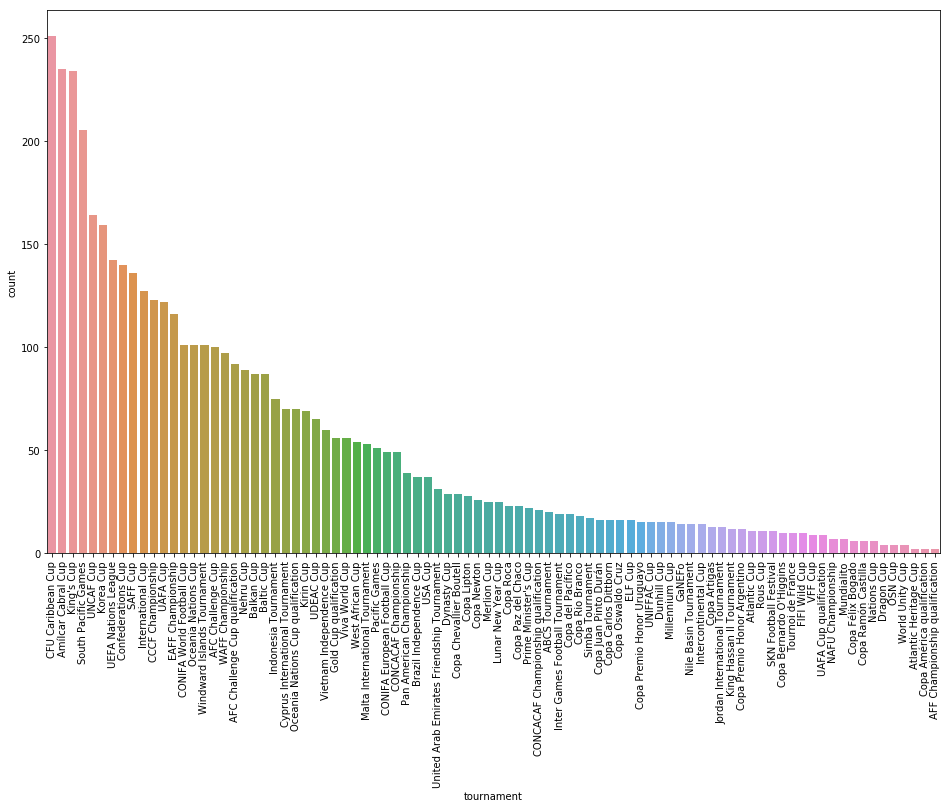

In [15]:
plt.figure(figsize=(16,10))

g = sns.barplot(x='tournament',
            y='count',
            hue=None,
            data=data_football_tournamentCount.tail(88),
            hue_order=None)

loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)

# Task 1 Analysis - Understand ranking of teams based on results from various competitions

For this task, the idea is to determine the outcome of each matches between the home and away teams, where the wining team will gain a score in points towards their ranking. The cumulative frequency of wining matches by each team will then determine its position on a ranking (leadership) board. The scores can be taken as three categories, winning the match, losing the match, and having a draw.


## 1.1 Remove 'Friendly' matches:

In [16]:
data_football = data_football_original.copy()
data_football = data_football[data_football.tournament != 'Friendly']

In [17]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False


In [18]:
data_football.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [19]:
data_football.shape

(23928, 9)

## 1.2 Calculate the Ranking Points:

The points are awarded as follows:
1. win = 1, draw = 0 and loss = -1

For this dataset, it was not possible to use the same ranking formula as seen in the references below:
- ref 1: https://www.get-digital-help.com/team-ranking-with-criteria/
- ref 2: https://www.goal.com/en-us/news/fifa-world-ranking-how-it-is-calculated-what-it-is-used-for/16w60sntgv7x61a6q08b7ooi0p


In [20]:
def task1_matchOutcomes(data):
    data = data.reset_index()
    data = data.drop(['index'], axis = 1)
    data_football = data
    
    data_football['match_outcome'] = np.nan

    list_teamOutcomes = []

    for idx in range(len(data_football)):
#         print(idx)
        if (data_football['home_score'][idx] > data_football['away_score'][idx]):
#             print('home')
            list_teamOutcomes.append('win')

        elif (data_football['home_score'][idx] < data_football['away_score'][idx]):
#             print('away')
            list_teamOutcomes.append('loss')

        else:
#             print('draw')
            list_teamOutcomes.append('draw')

    data_football['match_outcome'] = list_teamOutcomes
    
    return data_football;

In [21]:
def task1_rankPoints_homeTeam(data):
    
    data_football = data
    
    data_football['home_team_rank_points'] = np.nan

    list_teamOutcomes = []

    for idx in range(len(data_football)):
#         print(idx)
        if (data_football['match_outcome'][idx] == 'loss'):
#             print('home')
            list_teamOutcomes.append(int(-1))

        elif (data_football['match_outcome'][idx] == 'win'):
#             print('away')
            list_teamOutcomes.append(int(1))

        else:
            # else it is a DRAW:
#             print('draw')
            list_teamOutcomes.append(int(0))

    data_football['home_team_rank_points'] = list_teamOutcomes
    
    return data_football;

In [22]:
def task1_rankPoints_awayTeam(data):
    
    data_football = data
    
    data_football['away_team_rank_points'] = np.nan

    list_teamOutcomes = []

    for idx in range(len(data_football)):
#         print(idx)
        if (data_football['home_team_rank_points'][idx] == 1):
#             print('home')
            list_teamOutcomes.append(int(-1))

        elif (data_football['home_team_rank_points'][idx] == -1):
#             print('away')
            list_teamOutcomes.append(int(1))

        else:
            # else it is a DRAW:
#             print('draw')
            list_teamOutcomes.append(int(0))

    data_football['away_team_rank_points'] = list_teamOutcomes
    
    return data_football;

#### 1.2.1 - Assign the an Outcome to each matches: Using User Defined Func -> task1_matchOutcomes()

In [23]:
data_football = task1_matchOutcomes(data_football)
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_outcome
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,loss
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,win
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,loss
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,win
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,loss


#### 1.2.2 - Assign Scores to each matches based on outcome: Using User Defined Func -> task1_rankPoints_homeTeam() and task1_rankPoints_awayTeam()

In [24]:
data_football = task1_rankPoints_homeTeam(data_football)
data_football = task1_rankPoints_awayTeam(data_football)


In [25]:
data_football.head(15)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_outcome,home_team_rank_points,away_team_rank_points
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,loss,-1,1
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,win,1,-1
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,loss,-1,1
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,win,1,-1
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,loss,-1,1
5,1884-03-29,Scotland,Wales,4,1,British Championship,Glasgow,Scotland,False,win,1,-1
6,1885-02-28,England,Northern Ireland,4,0,British Championship,Manchester,England,False,win,1,-1
7,1885-03-14,England,Wales,1,1,British Championship,Blackburn,England,False,draw,0,0
8,1885-03-14,Scotland,Northern Ireland,8,2,British Championship,Glasgow,Scotland,False,win,1,-1
9,1885-03-21,England,Scotland,1,1,British Championship,London,England,False,draw,0,0


## 1.3 End of Year rankings:
This section takes the added feature columns from the section above and uses it to generate a new dictionary containing the relevant data for Task 1. The data generated will consist of the Tournament type, the team names, the years of games played within each teams and finally a list of the scores accummulated throughout the year.

The Example Dict: {Tournament: Team: {Year: [list of all scores]}}


In [26]:
def task1_EndYearRanks(data_football):
    # Dict of End of Year Ranks by Tournaments:
    dict_EndYearRanks = {}

    # Step 1 - Make of Copy of the Dataset:
    data_tournaments = data_football.copy()

    # Step 2 - Change the format of the Date column to DateTime:
    data_tournaments['date'] = pd.to_datetime(data_tournaments['date'])
    data_tournaments['year'] = data_tournaments['date'].dt.year

    # Step 3 - Take a subset of the DataFrame by Tournament type:
    tournament_list = list(data_tournaments['tournament'].unique())
    data_tournamentTypes_homeTeam = {}

    for i, tournamentName in enumerate(tournament_list):
    #     print(i, tournamentName)
        subset_data = data_tournaments[data_tournaments['tournament'] == tournamentName].iloc[:,:]
    #     print(subset_data)

        # List of team names:
        teamNames_list = list(subset_data['home_team'].unique())

        # Dict:
        dict_teamScores = {}

        # Step 4 - Collect the ranking point(Home Team):
        for j, teamNames  in enumerate(teamNames_list):
            print(j, teamNames)

            # Step 5 - Grab a Subset from main dataset:
            print('At index: ',i, '; Current HomeTeam is: ', teamNames_list[j])
            data_subset_team = subset_data.loc[subset_data['home_team'] == teamNames_list[j]]
            data_subset_team2 = subset_data.loc[subset_data['away_team'] == teamNames_list[j]]
    #         print(data_subset_team)

            # Step 6 - 
            # List of dates: by YEAR
            years_list = list(subset_data['year'].unique())

            # Dict:
            dict_yearAndScores = {}

            # Step 7 - make a list of the column['home_team_rank_points']:
            for (k, year), (m, year)  in zip(enumerate(years_list), enumerate(years_list)):
                data_subset_team_byYear = data_subset_team.loc[data_subset_team['year'] == years_list[k]]
                data_subset_team_byYear2 = data_subset_team2.loc[data_subset_team2['year'] == years_list[m]]

                # Dictionaries and Lists:
                input_scores = []
                total_score = 0
                subset_cummulative_scores = []

                # Make a list of the Input Socres from subset of Data:
                for l in data_subset_team_byYear.index:
                    point_values = data_subset_team_byYear['home_team_rank_points'][l]
                    input_scores.append(point_values)
                    
                for l in data_subset_team_byYear2.index:
                    point_values2 = data_subset_team_byYear2['away_team_rank_points'][l]
                    input_scores.append(point_values2)
                        
                # Step 8 - Sum of the Ranking point for this year:
                # Sum Calculations:
                total_score = sum(input_scores)
                subset_cummulative_scores.append(total_score)
                    
                # Append to Dict {dict_yearAndScores}: dict[key] = value
                subset_cummulative_scores = ','.join( str(a) for a in subset_cummulative_scores )
                dict_yearAndScores[str(year)] = subset_cummulative_scores
                            
            # Append to Dict {dict_teamScores}: dict[key] = value
            dict_teamScores[teamNames] = dict_yearAndScores

            
        # Step 9 - Update to the overall Dictionary: 
        # Append to Dict {dict_teamScores}: dict[key] = value
        data_tournamentTypes_homeTeam[tournamentName] = dict_teamScores
        dict_tournamentTypes_homeTeam = data_tournamentTypes_homeTeam
        
    return dict_tournamentTypes_homeTeam;
    

#### 1.3.1 - generate new dictionary for end of year ranking: Using User Defined Func -> task1_EndYearRanks()

In [27]:
dict_tournamentTypes_homeTeam = task1_EndYearRanks(data_football)

0 Northern Ireland
At index:  0 ; Current HomeTeam is:  Northern Ireland
1 Wales
At index:  0 ; Current HomeTeam is:  Wales
2 Scotland
At index:  0 ; Current HomeTeam is:  Scotland
3 England
At index:  0 ; Current HomeTeam is:  England
0 Argentina
At index:  1 ; Current HomeTeam is:  Argentina
1 Uruguay
At index:  1 ; Current HomeTeam is:  Uruguay
0 Argentina
At index:  2 ; Current HomeTeam is:  Argentina
1 Uruguay
At index:  2 ; Current HomeTeam is:  Uruguay
0 Argentina
At index:  3 ; Current HomeTeam is:  Argentina
0 Uruguay
At index:  4 ; Current HomeTeam is:  Uruguay
0 Argentina
At index:  5 ; Current HomeTeam is:  Argentina
1 Brazil
At index:  5 ; Current HomeTeam is:  Brazil
0 Chile
At index:  6 ; Current HomeTeam is:  Chile
1 Argentina
At index:  6 ; Current HomeTeam is:  Argentina
2 Brazil
At index:  6 ; Current HomeTeam is:  Brazil
3 Uruguay
At index:  6 ; Current HomeTeam is:  Uruguay
4 Paraguay
At index:  6 ; Current HomeTeam is:  Paraguay
5 Bolivia
At index:  6 ; Current Ho

In [28]:
dict_tournamentTypes_homeTeam

{'British Championship': {'Northern Ireland': {'1884': '-3',
   '1885': '-3',
   '1886': '-3',
   '1887': '-1',
   '1888': '-3',
   '1889': '-3',
   '1890': '-3',
   '1891': '-1',
   '1892': '-2',
   '1893': '-2',
   '1894': '-2',
   '1895': '-2',
   '1896': '-2',
   '1897': '-1',
   '1898': '-1',
   '1899': '-1',
   '1900': '-3',
   '1901': '-3',
   '1902': '-1',
   '1903': '2',
   '1904': '0',
   '1905': '-1',
   '1906': '-2',
   '1907': '-3',
   '1908': '-1',
   '1909': '-3',
   '1910': '0',
   '1911': '-3',
   '1912': '-1',
   '1913': '-1',
   '1914': '2',
   '1919': '0',
   '1920': '-2',
   '1921': '-2',
   '1922': '-2',
   '1923': '1',
   '1924': '-3',
   '1925': '-1',
   '1926': '0',
   '1927': '0',
   '1928': '-1',
   '1929': '-2',
   '1930': '-1',
   '1931': '-2',
   '1932': '-3',
   '1933': '0',
   '1934': '1',
   '1935': '-4',
   '1936': '-1',
   '1937': '-2',
   '1938': '-1',
   '1939': '-1',
   '1946': '-1',
   '1947': '2',
   '1948': '-3',
   '1949': '-1',
   '1950': '-2'

## 1.4 Convert Dictionary back to DataFrame:

In [29]:
data_tournamentTypes_homeTeam = pd.DataFrame.from_dict({(i,j,k): dict_tournamentTypes_homeTeam[i][j][k] 
                           for i in dict_tournamentTypes_homeTeam.keys() 
                           for j in dict_tournamentTypes_homeTeam[i].keys()
                            for k in dict_tournamentTypes_homeTeam[i][j].keys()},
                       orient='index')

In [30]:
data_tournamentTypes_homeTeam.head(20)

,0
"(British Championship, Northern Ireland, 1884)",-3
"(British Championship, Northern Ireland, 1885)",-3
"(British Championship, Northern Ireland, 1886)",-3
"(British Championship, Northern Ireland, 1887)",-1
"(British Championship, Northern Ireland, 1888)",-3
"(British Championship, Northern Ireland, 1889)",-3
"(British Championship, Northern Ireland, 1890)",-3
"(British Championship, Northern Ireland, 1891)",-1
"(British Championship, Northern Ireland, 1892)",-2
"(British Championship, Northern Ireland, 1893)",-2


In [31]:
data_tournamentTypes_homeTeam.shape

(34431, 1)

In [32]:
data_tournamentTypes_homeTeam.tail()

,0
"(Inter Games Football Tournament, Isle of Man, 2019)",2
"(Inter Games Football Tournament, Guernsey, 2019)",2
"(Inter Games Football Tournament, Western Isles, 2019)",-2
"(Inter Games Football Tournament, Orkney, 2019)",-2
"(Inter Games Football Tournament, Shetland, 2019)",-2


## 1.5 Edit the Index:

In [33]:
def task1_newDF_processing(dataFrame):
    
    data = dataFrame.reset_index()
    data = data.rename(columns={"index": "tournament"})
    data['RankPoints'] = data[0]
    data = data.drop(columns=[0])
    data_index = data.index
        
    data_new = pd.DataFrame(columns=['tournament','team','year','RankPoints'], index= data_index)
    # Step 1 - Separate the column data out: 
    for i in range(len(data['tournament'])):
#         print(i, len(test['tournament']))
#         print(test['tournament'][i])
        data_new['tournament'][i] = data['tournament'][i][0]
        data_new['team'][i] = data['tournament'][i][1]
        data_new['year'][i] = data['tournament'][i][2]
        data_new['RankPoints'][i] = data['RankPoints'][i]  
    
    dataFrame = data_new
    return dataFrame;


In [34]:
data_football_task1_v6 = task1_newDF_processing(data_tournamentTypes_homeTeam)

In [35]:
data_football_task1_v6.head()

,tournament,team,year,RankPoints
0,British Championship,Northern Ireland,1884,-3
1,British Championship,Northern Ireland,1885,-3
2,British Championship,Northern Ireland,1886,-3
3,British Championship,Northern Ireland,1887,-1
4,British Championship,Northern Ireland,1888,-3


In [36]:
data_football_task1_v6.tail()

,tournament,team,year,RankPoints
34426,Inter Games Football Tournament,Isle of Man,2019,2
34427,Inter Games Football Tournament,Guernsey,2019,2
34428,Inter Games Football Tournament,Western Isles,2019,-2
34429,Inter Games Football Tournament,Orkney,2019,-2
34430,Inter Games Football Tournament,Shetland,2019,-2


In [37]:
len(data_football_task1_v6)

34431

# Save the output into CSV format:

In [38]:
# IGNORE THIS ONE: better method of saving is in the next chunk of code.

# # path_directory
# data_football_grouped.to_csv(path_directory, 'football_task1', sep='\t')

In [39]:
# USE THIS ONE:

import os
# data_football_grouped_sorted.to_csv(os.path.join(path_directory, r'football_task1_sorted.csv'))
# data_football_grouped.to_csv(os.path.join(path_directory, r'football_task1.csv'))
# champion_df.to_csv(os.path.join(path_directory, r'champion_df.csv'))
# data_football_task1_v2.to_csv(os.path.join(path_directory, r'data_football_task1_v2.csv'))
# data_football.to_csv(os.path.join(path_directory, r'data_football_task1_withRankPoints.csv'))

# data_football_rankingOverTime.to_csv(os.path.join(path_directory, r'data_football_rankingOverTime.csv'))
# data_football.to_csv(os.path.join(path_directory, r'data_football_rankingOverTime_v5.csv'))
# data_tournamentTypes_homeTeam.to_csv(os.path.join(path_directory, r'data_football_rankingOverTime_v6.csv'))
# data_football_task1_v6.to_csv(os.path.join(path_directory, r'data_football_rankingOverTime_v7.csv'))
# data_football.to_csv(os.path.join(path_directory, r'data_football_RelevantTournaments.csv'))

## Backup codes:

In [40]:
# # Plot:

# categorical = list(data_football['tournament'].unique())

# # categorical = ['British Championship', 'Copa Lipton', 'Copa Newton']


# # fig, ax = plt.subplots(len(data_football_tournamentTypes_rankedTop5),1, figsize=(16, 25))
# # fig, ax = plt.subplots(len(categorical),1, figsize=(16, len(categorical)))

# fig, ax = plt.subplots(len(categorical),1, figsize=(16, (len(categorical)*3)))



# for i, (tournament_name, subplot) in enumerate(zip(categorical, ax.flatten())):
#     plt.figure(i)
#     fig.subplots_adjust(hspace=.5)
# #     sns.barplot(x='home_team',
# #                 y='match_scores',
# #                 data=data_football_tournamentTypes_rankedTop5[i]).set(xlabel='Home Teams', ylabel='Match Scores')
#     sns.countplot(x='home_team',
#                   y='match_scores',
#                   data=data_football_tournamentTypes_rankedTop5[i])
    
#     # Add Suplot Titles:
#     ax[i].set_title(tournament_name) 



# # Add Overall Plot title:
# fig.suptitle('Top 5 Ranking Teams in each Tournament') 

In [41]:
# subset_test = data_football_task1_v2.loc[data_football_task1_v2['home_team'] == homeTeam_list[2]]
# len(subset_test)


# input_scores = []
# total_score = 0
# subset_test_scores = []

# print(type(subset_test_scores))

# # Make a list of Input Scores from subset of Data:
# for j in subset_test.index:
#     print(j)
#     point_values = subset_test['rank_points'][j]
#     input_scores.append(point_values)
# #     print('Current taken point is: ', point_values)
# print('input scores: ', input_scores)

# # Cummulative Calculations:
# for values in input_scores:
#     total_score = total_score + values
#     subset_test_scores.append(total_score)

# print('Subset Cummulative scores: ', subset_test_scores)
# subset_test_scores


# subset_test['rank_test'] = pd.DataFrame(subset_test_scores, index = subset_test.index)



In [42]:
# homeTeam_list = list(data_football_task1_v2['home_team'].unique())

# dict_homeTeam_withTotalScores = {}


# # for i in range(len(homeTeam_list)):
# for i, home_team_name in enumerate(homeTeam_list):
#     print(i, home_team_name)

#     # Step 1 - Grab a Subset from main dataset:
#     print('At index: ',i, '; Current HomeTeam is: ', homeTeam_list[i])
#     data_subset = data_football_task1_v2.loc[data_football_task1_v2['home_team'] == homeTeam_list[i]]

#     # Step 2 - Perform Calculations on Ranking Points: 2 stages.
#     input_scores = []
#     total_score = 0
#     subset_cummulative_scores = []

#     # Make a list of Input Scores from subset of Data:
#     for j in data_subset.index:
#         point_values = data_subset['rank_points'][j]
#         input_scores.append(point_values)
#     print('input scores: ', input_scores)

#     # Cummulative Calculations:
#     for values in input_scores:
#         total_score = total_score + values
#         subset_cummulative_scores.append(total_score)

#     print('Subset Cummulative scores: ', subset_cummulative_scores)

#     # Step 3 - Save the total scores for each of the homeTeams in a Dictionary:
#     dict_homeTeam_withTotalScores[home_team_name] = subset_cummulative_scores

In [43]:
# data_rankingOverTime = data_football_task1_v2.copy()

# homeTeam_list = list(data_rankingOverTime['home_team'].unique())

# data_football_rankingOverTime = pd.DataFrame()

# for i, home_team_name in enumerate(homeTeam_list):
#     print(i, home_team_name)
    
# #     data_freshCopy = data_football_task1_v2.copy()
    
#     # Get the indexes from subset data:
#     data_subset = data_rankingOverTime[data_rankingOverTime['home_team'] == home_team_name].iloc[:,:]
# #     print(data_subset)
#     index_df = data_subset.index
    
#     # Convert cummulative scores into a dataframe(from list), with the correct indexing by homeTeams:
#     list_score = dict_homeTeam_withTotalScores[home_team_name]
#     print(list_score, type(list_score))
    
#     df_temp = pd.DataFrame(list_score, columns=['RankOverTime'], index = index_df)
#     print(df_temp)

#     # Combine the temporary Dataframe with the Subset of Data taken:
#     mergedDf = pd.merge(data_subset, df_temp, left_index=True, right_index=True)
#     print(mergedDf)
    
#     # Append to the main Dataset with mergeDf:
#     data_football_rankingOverTime = data_football_rankingOverTime.append(mergedDf, ignore_index = True)
    

In [44]:
# # Dict of End of Year Ranks by Tournaments:
# dict_EndYearRanks = {}

# # Step 1 - Make of Copy of the Dataset:
# data_tournaments = data_football.copy()

# # Step 2 - Change the format of the Date column to DateTime:
# data_tournaments['date'] = pd.to_datetime(data_tournaments['date'])
# data_tournaments['year'] = data_tournaments['date'].dt.year

# # Step 3 - Take a subset of the DataFrame by Tournament type:
# tournament_list = list(data_tournaments['tournament'].unique())
# data_tournamentTypes_awayTeam = {}

# for i, tournamentName in enumerate(tournament_list):
# #     print(i, tournamentName)
#     subset_data = data_tournaments[data_tournaments['tournament'] == tournamentName].iloc[:,:]
# #     print(subset_data)

#     # List of team names:
#     teamNames_list = list(subset_data['away_team'].unique())

#     # Dict:
#     dict_teamScores = {}
    
#     # Step 4 - Collect the ranking point(Home Team):
#     for j, teamNames  in enumerate(teamNames_list):
#         print(j, teamNames)

#         # Step 5 - Grab a Subset from main dataset:
#         print('At index: ',i, '; Current AwayTeam is: ', teamNames_list[j])
#         data_subset_team = subset_data.loc[subset_data['away_team'] == teamNames_list[j]]
# #         print(data_subset_team)
        
#         # Step 6 - 
#         # List of dates: by YEAR
#         years_list = list(subset_data['year'].unique())
        
#         # Dict:
#         dict_yearAndScores = {}

#         # Step 7 - make a list of the column['home_team_rank_points']:
#         for k, year  in enumerate(years_list):
#             print('At index: ',k, '; Current AwayTeam is: ', years_list[k])
#             data_subset_team_byYear = data_subset_team.loc[data_subset_team['year'] == years_list[k]]
# #             print(data_subset_team_byYear)
            
#             # Dictionaries and Lists:
#             input_scores = []
#             total_score = 0
#             subset_cummulative_scores = []
            
#             # Make a list of the Input Socres from subset of Data:
#             for l in data_subset_team_byYear.index:
#                 point_values = data_subset_team_byYear['away_team_rank_points'][l]
#                 input_scores.append(point_values)
            
#             # Append to Dict {dict_yearAndScores}: dict[key] = value
#             dict_yearAndScores[year] = input_scores

#         # Step 8 - Update both the Home and Away team score to the overall Dictionary: 
            
#         # Append to Dict {dict_teamScores}: dict[key] = value
#         dict_teamScores[teamNames] = dict_yearAndScores
        
#     # Append to Dict {dict_teamScores}: dict[key] = value
#     data_tournamentTypes_awayTeam[tournamentName] = dict_teamScores           
            

In [45]:
# # Dict of End of Year Ranks by Tournaments:
# dict_EndYearRanks = {}

# # Step 1 - Make of Copy of the Dataset:
# data_tournaments = data_football.copy()

# # Step 2 - Change the format of the Date column to DateTime:
# data_tournaments['date'] = pd.to_datetime(data_tournaments['date'])
# data_tournaments['year'] = data_tournaments['date'].dt.year

# # Step 3 - Take a subset of the DataFrame by Tournament type:
# tournament_list = list(data_tournaments['tournament'].unique())
# data_tournamentTypes_homeTeam = {}

# for i, tournamentName in enumerate(tournament_list):
# #     print(i, tournamentName)
#     subset_data = data_tournaments[data_tournaments['tournament'] == tournamentName].iloc[:,:]
# #     print(subset_data)

#     # List of team names:
#     teamNames_list_home = list(subset_data['home_team'].unique())
#     teamNames_list_away = list(subset_data['away_team'].unique())

#     # Dict:
#     dict_teamScores = {}
    
#     # Step 4 - Collect the ranking point(Home Team):
#     for j, teamNames  in enumerate(teamNames_list):
#         print(j, teamNames)

#         # Step 5 - Grab a Subset from main dataset:
#         print('At index: ',i, '; Current HomeTeam is: ', teamNames_list[j])
#         data_subset_team = subset_data.loc[subset_data['home_team'] == teamNames_list[j]]
# #         print(data_subset_team)
        
#         # Step 6 - 
#         # List of dates: by YEAR
#         years_list = list(subset_data['year'].unique())
        
#         # Dict:
#         dict_yearAndScores = {}

#         # Step 7 - make a list of the column['home_team_rank_points']:
#         for k, year  in enumerate(years_list):
#             print('At index: ',k, '; Current HomeTeam is: ', years_list[k])
#             data_subset_team_byYear = data_subset_team.loc[data_subset_team['year'] == years_list[k]]
# #             print(data_subset_team_byYear)
            
#             # Dictionaries and Lists:
#             input_scores = []
#             total_score = 0
#             subset_cummulative_scores = []
            
#             # Make a list of the Input Socres from subset of Data:
#             for l in data_subset_team_byYear.index:
#                 point_values = data_subset_team_byYear['home_team_rank_points'][l]
#                 input_scores.append(point_values)
            
#             # Append to Dict {dict_yearAndScores}: dict[key] = value
#             dict_yearAndScores[year] = input_scores
            
            
            
            
            
            

#         # Step 8 - Update both the Home and Away team score to the overall Dictionary: 
            
#         # Append to Dict {dict_teamScores}: dict[key] = value
#         dict_teamScores[teamNames] = dict_yearAndScores
        
#     # Append to Dict {dict_teamScores}: dict[key] = value
#     data_tournamentTypes_homeTeam[tournamentName] = dict_teamScores           
            



In [46]:
# # Dict of End of Year Ranks by Tournaments:
# dict_EndYearRanks = {}

# # Step 1 - Make of Copy of the Dataset:
# data_tournaments = data_football.copy()

# # Step 2 - Change the format of the Date column to DateTime:
# data_tournaments['date'] = pd.to_datetime(data_tournaments['date'])
# data_tournaments['year'] = data_tournaments['date'].dt.year

# # Step 3 - Take a subset of the DataFrame by Tournament type:
# tournament_list = list(data_tournaments['tournament'].unique())
# data_tournamentTypes_homeTeam = {}

# for i, tournamentName in enumerate(tournament_list):
# #     print(i, tournamentName)
#     subset_data = data_tournaments[data_tournaments['tournament'] == tournamentName].iloc[:,:]
# #     print(subset_data)

#     # List of team names:
#     teamNames_list = list(subset_data['home_team'].unique())

#     # Dict:
#     dict_teamScores = {}
    
#     # Step 4 - Collect the ranking point(Home Team):
#     for j, teamNames  in enumerate(teamNames_list):
#         print(j, teamNames)

#         # Step 5 - Grab a Subset from main dataset:
#         print('At index: ',i, '; Current HomeTeam is: ', teamNames_list[j])
#         data_subset_team = subset_data.loc[subset_data['home_team'] == teamNames_list[j]]
# #         print(data_subset_team)
        
#         # Step 6 - 
#         # List of dates: by YEAR
#         years_list = list(subset_data['year'].unique())
        
#         # Dict:
#         dict_yearAndScores = {}
               
#         # Step 7 - make a list of the column['home_team_rank_points']:
#         for k, year  in enumerate(years_list):
#             print('At index: ',k, '; Current HomeTeam is: ', years_list[k])
#             data_subset_team_byYear = data_subset_team.loc[data_subset_team['year'] == years_list[k]]
# #             print(data_subset_team_byYear)
            
#             # Dictionaries and Lists:
#             input_scores = []
#             total_score = 0
#             subset_cummulative_scores = []
            
#             # Make a list of the Input Socres from subset of Data:
#             for l in data_subset_team_byYear.index:
#                 point_values = data_subset_team_byYear['home_team_rank_points'][l]
#                 input_scores.append(point_values)
                
#                 point_values2 = data_subset_team_byYear['away_team_rank_points'][l]
#                 input_scores.append(point_values2)
                
            
#             # Append to Dict {dict_yearAndScores}: dict[key] = value
#             dict_yearAndScores[year] = input_scores
            
#         # Append to Dict {dict_teamScores}: dict[key] = value
#         dict_teamScores[teamNames] = dict_yearAndScores    

#         # Step 8 - Update XXX to the overall Dictionary: 
            
# #         # Append to Dict {dict_teamScores}: dict[key] = value
# #         dict_teamScores[teamNames] = dict_yearAndScores
        
#     # Append to Dict {dict_teamScores}: dict[key] = value
#     data_tournamentTypes_homeTeam[tournamentName] = dict_teamScores           
            



## Place the Ranking Points back to the respective year: A.K.A the last game of the year

In [47]:
# def task1_football_processing(data_football):
#     print('Start of Processing...')
    
#     # Step 1 - make copy of dataset:
#     data_football_tournaments = data_football.copy()
    
#     # Step 2 - reformat the date column to datetime format:
#     data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
#     # Step 3 - Partition each competition into a Dictionary:
    
#     tournament_list = list(data_football_tournaments['tournament'].unique())
#     data_football_tournamentTypes = {}
    
#     for i, j in enumerate(tournament_list):
    
#         data_football_tournamentTypes[i] = data_football_tournaments[data_football_tournaments['tournament']== j].iloc[:,:]
 
    
#     # Step 4 - reformat the date column to datetime format:
#     data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
#     # Step 5 - Get the Winning Teams from each competition, then place them into a dictionary.
#     #          This step should make a Nested Dictionary of the required data.
#     dict_winners_inEachYear_allTournaments = {}

#     # For all tournaments:
#     for i, dataframe_tournaments in data_football_tournamentTypes.items():
#     #     print(i, pd.DataFrame(dataframe_tournaments))
#         print('Tournament index (OuterLoop):', i)

#         # Time Calculations:
#         dataframe_tournaments['year'], dataframe_tournaments['month'] = dataframe_tournaments['date'].dt.year, dataframe_tournaments['date'].dt.month
#         inYear = dataframe_tournaments['year'].unique()
# #         print(inYear)

#         # Number of Games played in each year: 
#         nb_gamesPlayed_inThisTournament = dataframe_tournaments.year.value_counts().to_frame()
# #         print('Length of nb_game: ',len(nb_gamesPlayed_inThisTournament))

#         dict_winners_inEachYear = {}
#         df_forAppend = []

#         # for individual tournaments:
#         for k in range(len(nb_gamesPlayed_inThisTournament)):
#             print(k)
#             idx_game = nb_gamesPlayed_inThisTournament.get_value(nb_gamesPlayed_inThisTournament.index[k], col = 'year')
#             print('index: ' , idx_game)

#             gameYear = nb_gamesPlayed_inThisTournament.index[k]
#             print('The yr of this game: ', gameYear, ' and there were ', idx_game, ' played.')

#             # take out the winners from this game (from the main Dataframe):
#             temp_series = dataframe_tournaments[dataframe_tournaments['year'] == gameYear].iloc[idx_game-1,:]
#             temp_df = temp_series.to_frame()
#             temp_df = temp_df.transpose()        
#             df_forAppend.append(temp_df)

#             # Find index for key/value: key part -> key_tournamentName
#             index_temp_df = temp_df.index
#             key_tournamentName = temp_df.get_value(index_temp_df[0], col = 'tournament')

#             # Append to the Dictionary for a specific Tournament:
#             dict_winners_inEachYear[key_tournamentName] = df_forAppend

#     #         print(dict_winners_inEachYear)

#             # ==== End of Loop ====
#         dict_winners_inEachYear_allTournaments[i] = dict_winners_inEachYear
#         print('--- Adding innder dictionary data to the partial Nested Dict: Complete.')
        
#         data_final = dict_winners_inEachYear_allTournaments
        
#     return data_final; 



In [48]:
# tournament_list = list(data_tournaments['tournament'].unique())
# teamNames_list = list(subset_data['home_team'].unique())
# years_list = list(subset_data['year'].unique())



## Find the Winning teams in each of the tournaments.
This is done by taking the last teams (a.k.a Winning Teams) in each competition year, for individual types of tournament.

In [49]:
# def task1_football_processing(data_football):
#     print('Start of Processing...')
    
#     # Step 1 - make copy of dataset:
#     data_football_tournaments = data_football.copy()
    
#     # Step 2 - reformat the date column to datetime format:
#     data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
#     # Step 3 - Partition each competition into a Dictionary:
    
#     tournament_list = list(data_football_tournaments['tournament'].unique())
#     data_football_tournamentTypes = {}
    
#     for i, j in enumerate(tournament_list):
    
#         data_football_tournamentTypes[i] = data_football_tournaments[data_football_tournaments['tournament']== j].iloc[:,:]
 
    
#     # Step 4 - reformat the date column to datetime format:
#     data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
#     # Step 5 - Get the Winning Teams from each competition, then place them into a dictionary.
#     #          This step should make a Nested Dictionary of the required data.
#     dict_winners_inEachYear_allTournaments = {}

#     # For all tournaments:
#     for i, dataframe_tournaments in data_football_tournamentTypes.items():
#     #     print(i, pd.DataFrame(dataframe_tournaments))
#         print('Tournament index (OuterLoop):', i)

#         # Time Calculations:
#         dataframe_tournaments['year'], dataframe_tournaments['month'] = dataframe_tournaments['date'].dt.year, dataframe_tournaments['date'].dt.month
#         inYear = dataframe_tournaments['year'].unique()
# #         print(inYear)

#         # Number of Games played in each year: 
#         nb_gamesPlayed_inThisTournament = dataframe_tournaments.year.value_counts().to_frame()
# #         print('Length of nb_game: ',len(nb_gamesPlayed_inThisTournament))

#         dict_winners_inEachYear = {}
#         df_forAppend = []

#         # for individual tournaments:
#         for k in range(len(nb_gamesPlayed_inThisTournament)):
#             print(k)
#             idx_game = nb_gamesPlayed_inThisTournament.get_value(nb_gamesPlayed_inThisTournament.index[k], col = 'year')
#             print('index: ' , idx_game)

#             gameYear = nb_gamesPlayed_inThisTournament.index[k]
#             print('The yr of this game: ', gameYear, ' and there were ', idx_game, ' played.')

#             # take out the winners from this game (from the main Dataframe):
#             temp_series = dataframe_tournaments[dataframe_tournaments['year'] == gameYear].iloc[idx_game-1,:]
#             temp_df = temp_series.to_frame()
#             temp_df = temp_df.transpose()        
#             df_forAppend.append(temp_df)

#             # Find index for key/value: key part -> key_tournamentName
#             index_temp_df = temp_df.index
#             key_tournamentName = temp_df.get_value(index_temp_df[0], col = 'tournament')

#             # Append to the Dictionary for a specific Tournament:
#             dict_winners_inEachYear[key_tournamentName] = df_forAppend

#     #         print(dict_winners_inEachYear)

#             # ==== End of Loop ====
#         dict_winners_inEachYear_allTournaments[i] = dict_winners_inEachYear
#         print('--- Adding innder dictionary data to the partial Nested Dict: Complete.')
        
#         data_final = dict_winners_inEachYear_allTournaments
        
#     return data_final; 


In [50]:
# def task1_football_convert2DataFrame(data, data_football):
    
#     dict_winners_inEachYear_allTournaments = data
    
#     categorical = list(data_football['tournament'].unique())

#     champion_df = pd.DataFrame()

#     for i, tournament_names in enumerate(categorical):
#         print(i, tournament_names)
#         dict_temp = dict_winners_inEachYear_allTournaments[i]
#         dict_temp_tour = dict_temp[tournament_names]
#         champion_df = champion_df.append(dict_temp_tour, ignore_index = True)

#     return champion_df; 


### Perform the processing on the dataset for Task 1:
This will be a 2 stage process.

In [51]:
# # Part 1 - Process the Dataset:
# data_football_task1 = task1_football_processing(data_football)
# type(data_football_task1)

In [52]:
# Part 2 - Extract the information into single Dataframe:
# data_football_task1_df = task1_football_convert2DataFrame(data_football_task1, data_football)

In [53]:
# data_football_task1_df.head()

### Label which Teams won their Championships:

In [54]:
# def task1_winningTeam(data):
    
#     data_football = data
    
#     data_football['winning_team'] = np.nan

#     list_teamOutcomes = []

#     for idx in range(len(data_football)):
# #         print(idx)
#         if (data_football['home_score'][idx] > data_football['away_score'][idx]):
# #             print('home')
#             list_teamOutcomes.append('home')

#         elif (data_football['home_score'][idx] < data_football['away_score'][idx]):
# #             print('away')
#             list_teamOutcomes.append('away')

#         else:
# #             print('draw')
#             list_teamOutcomes.append('draw')

#     data_football['winning_team'] = list_teamOutcomes
    
#     return data_football;

In [55]:
# data_football_task1_v2 = task1_winningTeam(data_football_task1_df)
# data_football_task1_v2.head()

In [56]:
# data_football_task1_v2.head(20)

## Cummulative count of the Ranking points over the years:

In [57]:
# def task1_createDict_rankingCummulative(data):
    
#     homeTeam_list = list(data['home_team'].unique())

#     dict_homeTeam_withTotalScores = {}

#     for i, home_team_name in enumerate(homeTeam_list):
# #         print(i, home_team_name)

#         # Step 1 - Grab a Subset from main dataset:
#         print('At index: ',i, '; Current HomeTeam is: ', homeTeam_list[i])
#         data_subset = data.loc[data['home_team'] == homeTeam_list[i]]

#         # Step 2 - Perform Calculations on Ranking Points: 2 stages.
#         input_scores = []
#         total_score = 0
#         subset_cummulative_scores = []

#         # Make a list of Input Scores from subset of Data:
#         for j in data_subset.index:
#             point_values = data_subset['rank_points'][j]
#             input_scores.append(point_values)
#         print('input scores: ', input_scores)

#         # Cummulative Calculations:
#         for values in input_scores:
#             total_score = total_score + values
#             subset_cummulative_scores.append(total_score)

#         print('Subset Cummulative scores: ', subset_cummulative_scores)

#         # Step 3 - Save the total scores for each of the homeTeams in a Dictionary:
#         dict_homeTeam_withTotalScores[home_team_name] = subset_cummulative_scores
    
#     return dict_homeTeam_withTotalScores;


In [58]:
# def task1_convert2DF_rankingCummulative(dict_homeTeam_withTotalScores, data_football_task1_v2):
   
#     data_rankingOverTime = data_football_task1_v2.copy()

#     homeTeam_list = list(data_rankingOverTime['home_team'].unique())

#     data_football_rankingOverTime = pd.DataFrame()

#     for i, home_team_name in enumerate(homeTeam_list):
#         print(i, home_team_name)

#         # Get the indexes from subset data:
#         data_subset = data_rankingOverTime[data_rankingOverTime['home_team'] == home_team_name].iloc[:,:]
#         index_df = data_subset.index

#         # Convert cummulative scores into a dataframe(from list), with the correct indexing by homeTeams:
#         list_score = dict_homeTeam_withTotalScores[home_team_name]
#         df_temp = pd.DataFrame(list_score, columns=['RankOverTime'], index = index_df)

#         # Combine the temporary Dataframe with the Subset of Data taken:
#         mergedDf = pd.merge(data_subset, df_temp, left_index=True, right_index=True)

#         # Append to the main Dataset with mergeDf:
#         data_football_rankingOverTime = data_football_rankingOverTime.append(mergedDf, ignore_index = True)

    
#     return data_football_rankingOverTime; 

In [59]:
# Output Dictionary:
# dict_homeTeam_withTotalScores = task1_createDict_rankingCummulative(data_football)


In [60]:
# Output DataFrame:
# data_football_rankingOverTime2 = task1_convert2DF_rankingCummulative(dict_homeTeam_withTotalScores, data_football)


In [61]:
# data_football_rankingOverTime2.head()

In [62]:
# def task1_football_processing(data_football):
#     print('Start of Processing...')
    
#     # Step 1 - make copy of dataset:
#     data_football_tournaments = data_football.copy()
    
#     # Step 2 - reformat the date column to datetime format:
#     data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
#     # Step 3 - Partition each competition into a Dictionary:
    
#     tournament_list = list(data_football_tournaments['tournament'].unique())
#     data_football_tournamentTypes = {}
    
#     for i, j in enumerate(tournament_list):
    
#         data_football_tournamentTypes[i] = data_football_tournaments[data_football_tournaments['tournament']== j].iloc[:,:]
 
    
#     # Step 4 - reformat the date column to datetime format:
#     data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
#     # Step 5 - Get the Winning Teams from each competition, then place them into a dictionary.
#     #          This step should make a Nested Dictionary of the required data.
#     dict_winners_inEachYear_allTournaments = {}

#     # For all tournaments:
#     for i, dataframe_tournaments in data_football_tournamentTypes.items():
#     #     print(i, pd.DataFrame(dataframe_tournaments))
#         print('Tournament index (OuterLoop):', i)

#         # Time Calculations:
#         dataframe_tournaments['year'], dataframe_tournaments['month'] = dataframe_tournaments['date'].dt.year, dataframe_tournaments['date'].dt.month
#         inYear = dataframe_tournaments['year'].unique()
# #         print(inYear)

#         # Number of Games played in each year: 
#         nb_gamesPlayed_inThisTournament = dataframe_tournaments.year.value_counts().to_frame()
# #         print('Length of nb_game: ',len(nb_gamesPlayed_inThisTournament))

#         dict_winners_inEachYear = {}
#         df_forAppend = []

#         # for individual tournaments:
#         for k in range(len(nb_gamesPlayed_inThisTournament)):
#             print(k)
#             idx_game = nb_gamesPlayed_inThisTournament.get_value(nb_gamesPlayed_inThisTournament.index[k], col = 'year')
#             print('index: ' , idx_game)

#             gameYear = nb_gamesPlayed_inThisTournament.index[k]
#             print('The yr of this game: ', gameYear, ' and there were ', idx_game, ' played.')

#             # take out the winners from this game (from the main Dataframe):
#             temp_series = dataframe_tournaments[dataframe_tournaments['year'] == gameYear].iloc[idx_game-1,:]
#             temp_df = temp_series.to_frame()
#             temp_df = temp_df.transpose()        
#             df_forAppend.append(temp_df)

#             # Find index for key/value: key part -> key_tournamentName
#             index_temp_df = temp_df.index
#             key_tournamentName = temp_df.get_value(index_temp_df[0], col = 'tournament')

#             # Append to the Dictionary for a specific Tournament:
#             dict_winners_inEachYear[key_tournamentName] = df_forAppend

#     #         print(dict_winners_inEachYear)

#             # ==== End of Loop ====
#         dict_winners_inEachYear_allTournaments[i] = dict_winners_inEachYear
#         print('--- Adding innder dictionary data to the partial Nested Dict: Complete.')
        
#         data_final = dict_winners_inEachYear_allTournaments
        
#     return data_final; 

